# Importação de bibliotecas e caregamento dos dados

In [35]:
# Tratamento de dados
import pandas as pd
import numpy as np 

# Bibliotecas para EDA
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

# Não exisbir warnings
import warnings
warnings.filterwarnings("ignore")

# Fazendo o ggplot ser o estilo padrao de todos os plots
plt.style.use('ggplot') 

# Configurar para exibir ate 15 linhas de um DF em pandas e para mostrar todas as colunas
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)

In [106]:
churn = pd.read_csv('Churn Modeling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
churn.shape

(10000, 14)

In [29]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Como esse dataset não possui valores faltantes, vamos remover aleatoriamente 10% de cada coluna

In [107]:
def remover_10_porcento(coluna):
    tam = len(coluna)
    indices_a_remover = np.random.choice(tam, size=int(0.1 * tam), replace=False)
    coluna.iloc[indices_a_remover] = np.nan
    return coluna

churn = churn.apply(remover_10_porcento, axis=0)

In [108]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9000 non-null   float64
 1   CustomerId       9000 non-null   float64
 2   Surname          9000 non-null   object 
 3   CreditScore      9000 non-null   float64
 4   Geography        9000 non-null   object 
 5   Gender           9000 non-null   object 
 6   Age              9000 non-null   float64
 7   Tenure           9000 non-null   float64
 8   Balance          9000 non-null   float64
 9   NumOfProducts    9000 non-null   float64
 10  HasCrCard        9000 non-null   float64
 11  IsActiveMember   9000 non-null   float64
 12  EstimatedSalary  9000 non-null   float64
 13  Exited           9000 non-null   float64
dtypes: float64(11), object(3)
memory usage: 1.1+ MB


In [33]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9000.000000,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,5006.020444,1.569056e+07,650.584222,38.933444,5.003111,76431.397797,1.526444,0.702778,0.515222,100033.099996,0.203111
std,2887.067548,7.193444e+04,97.018495,10.471723,2.891026,62372.690272,0.579851,0.457061,0.499796,57538.791124,0.402337
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2507.500000,1.562800e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51113.055000,0.000000
50%,5008.500000,1.569018e+07,652.000000,37.000000,5.000000,97016.180000,1.000000,1.000000,1.000000,100000.325000,0.000000
75%,7513.250000,1.575270e+07,718.000000,44.000000,7.000000,127562.710000,2.000000,1.000000,1.000000,149373.527500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Tratamento de dados ausentes e definição de tipos

In [109]:
colunas_numericas = churn.select_dtypes(include=[np.number]).columns.tolist()
colunas_categoricas = churn.select_dtypes(exclude=[np.number]).columns.tolist()

transformer_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

transformer_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numerico, colunas_numericas),
        ('cat', transformer_categorico, colunas_categoricas)
    ]
)

churn_transformed = preprocessor.fit_transform(churn)
churn_transformed = pd.DataFrame(churn_transformed, columns=colunas_numericas + colunas_categoricas)

for col in colunas_categoricas:
    churn_transformed[col] = churn_transformed[col].astype('category')
for col in colunas_numericas:
    churn_transformed[col] = pd.to_numeric(churn_transformed[col])

churn_transformed.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname,Geography,Gender
0,1.0,15634602.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,Martin,France,Female
1,2.0,15647311.0,608.0,41.0,5.0,83807.86,1.0,0.0,1.0,112542.58,0.0,Hill,Spain,Female
2,3.0,15619304.0,502.0,42.0,8.0,159660.80,1.0,1.0,0.0,113931.57,1.0,Onio,France,Female
3,5009.5,15701354.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,Boni,France,Female
4,5.0,15737888.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,Mitchell,Spain,Female


In [45]:
churn_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  float64 
 1   CustomerId       10000 non-null  float64 
 2   CreditScore      10000 non-null  float64 
 3   Age              10000 non-null  float64 
 4   Tenure           10000 non-null  float64 
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  float64 
 7   HasCrCard        10000 non-null  float64 
 8   IsActiveMember   10000 non-null  float64 
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  float64 
 11  Surname          10000 non-null  category
 12  Geography        10000 non-null  category
 13  Gender           10000 non-null  category
dtypes: category(3), float64(11)
memory usage: 986.3 KB


# Normalização / Discretização

# Limpeza de dados(tratamento de outliers)

## Univariados(método de tukey)

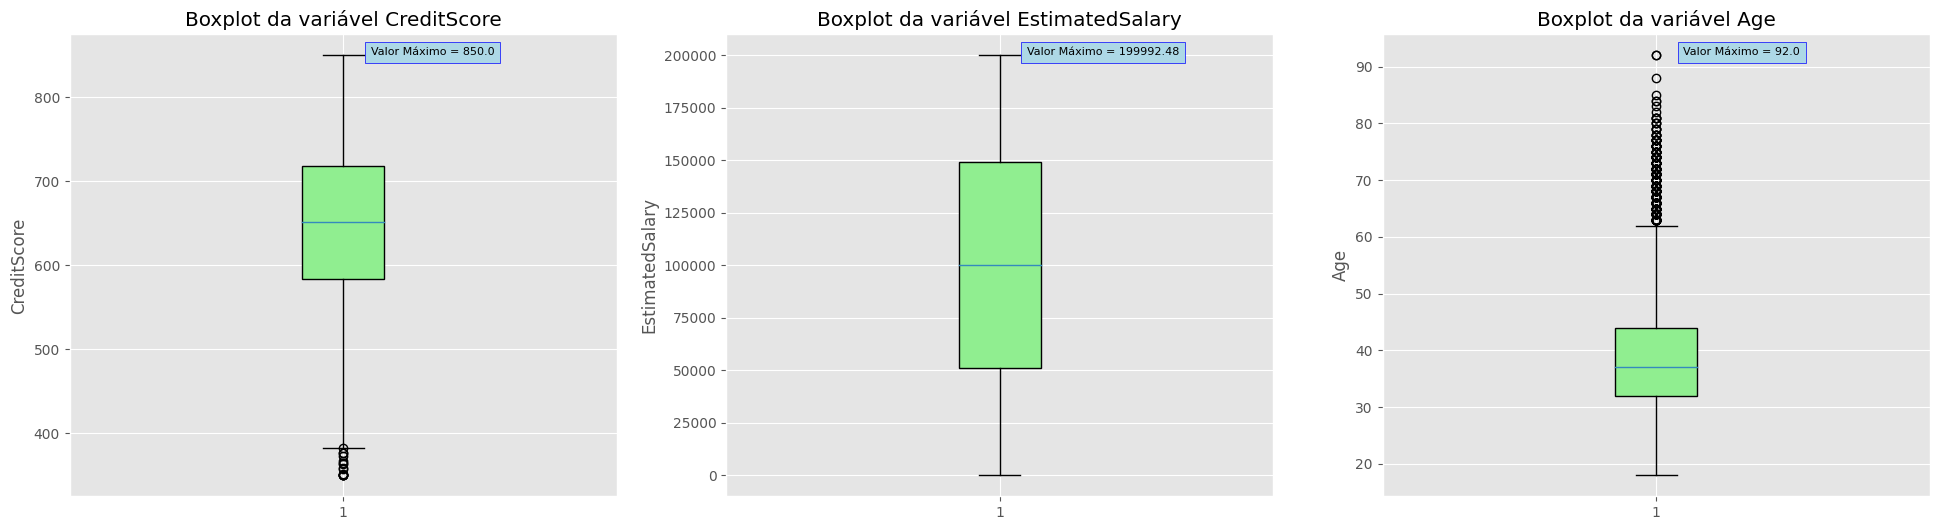

In [62]:
def plot_boxplot(data, variable_name, title, ax):
    bp = ax.boxplot(data, patch_artist=True)
    ax.set_title(title)
    ax.set_ylabel(variable_name)
    bp['boxes'][0].set_facecolor('lightgreen')
    max_value = np.max(data)
    ax.annotate(f'Valor Máximo = {max_value}', 
                xy=(1, max_value),
                xytext=(1.05, max_value),
                bbox=dict(facecolor='lightblue', edgecolor='blue'),
                fontsize=8)

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

variables = ['CreditScore', 'EstimatedSalary', 'Age']
titles = ['Boxplot da variável CreditScore', 
          'Boxplot da variável EstimatedSalary', 
          'Boxplot da variável Age']

for i, (variable, title) in enumerate(zip(variables, titles)):
    plot_boxplot(churn_transformed[variable], variable, title, axes[i])

plt.show()

Já vimos aalguns possiveis outliers, vamos analisar a distribuição e checar se é simetrica

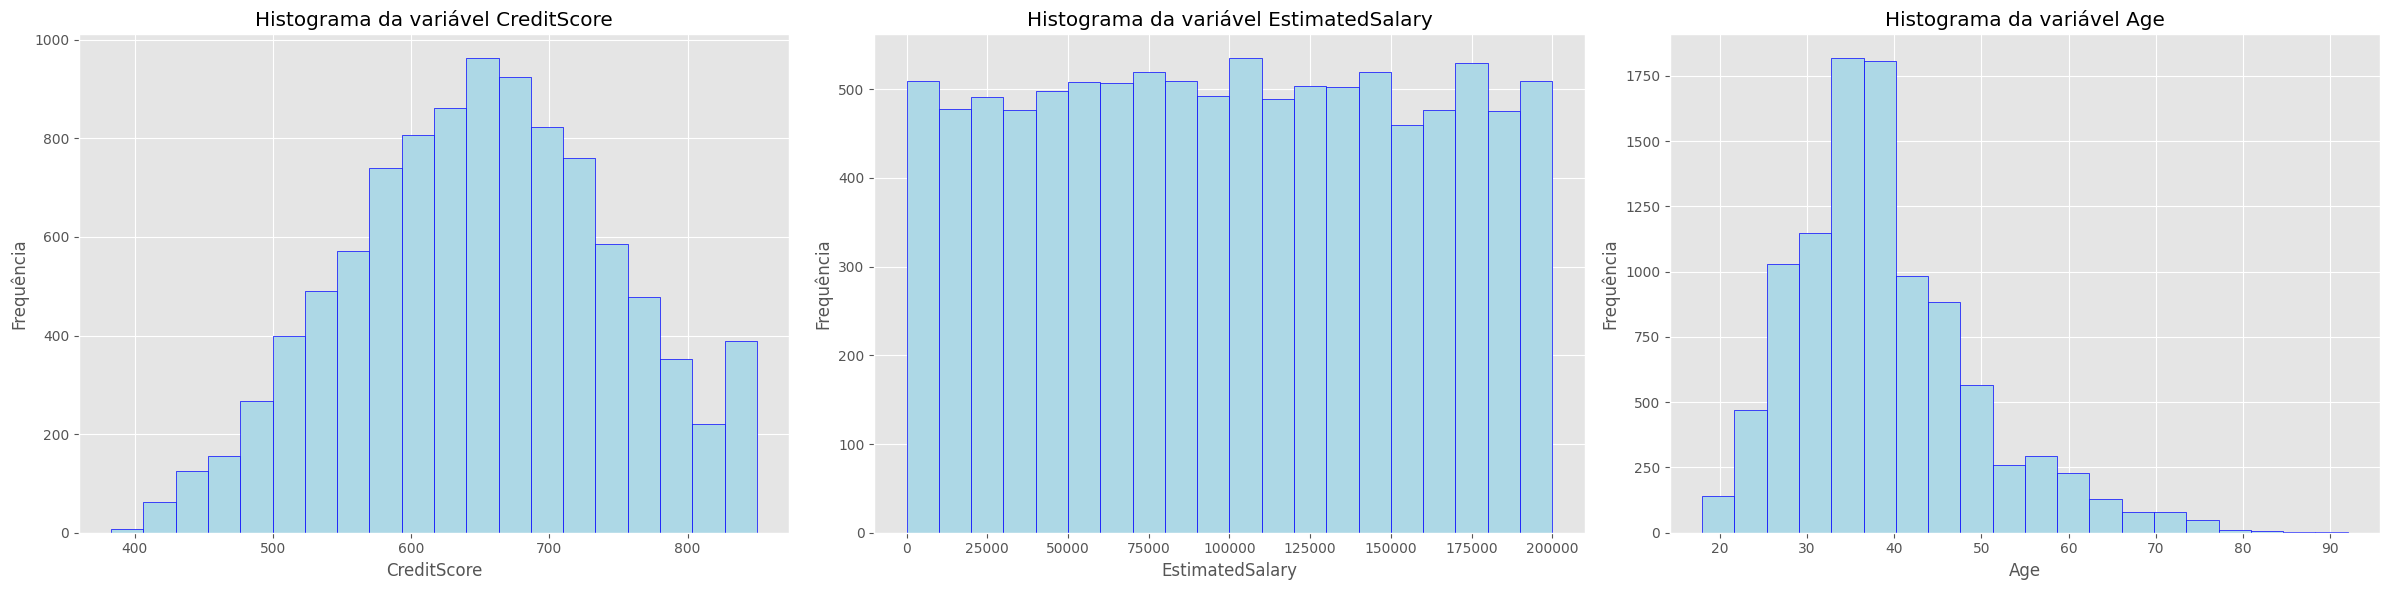

In [99]:
def plot_histogram(data, variable_name, title, ax):
    ax.hist(data, bins=20, color='lightblue', edgecolor='blue')
    ax.set_title(title)
    ax.set_xlabel(variable_name)
    ax.set_ylabel('Frequência')

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

variables = ['CreditScore', 'EstimatedSalary', 'Age']
titles = ['Histograma da variável CreditScore', 
          'Histograma da variável EstimatedSalary', 
          'Histograma da variável Age']

for i, (variable, title) in enumerate(zip(variables, titles)):
    plot_histogram(churn_transformed[variable], variable, title, axes[i])

plt.tight_layout()
plt.show()

Temos que aplicar o log na variavel de salario, as variaveis de credito e idade seguem distribuição simatrica

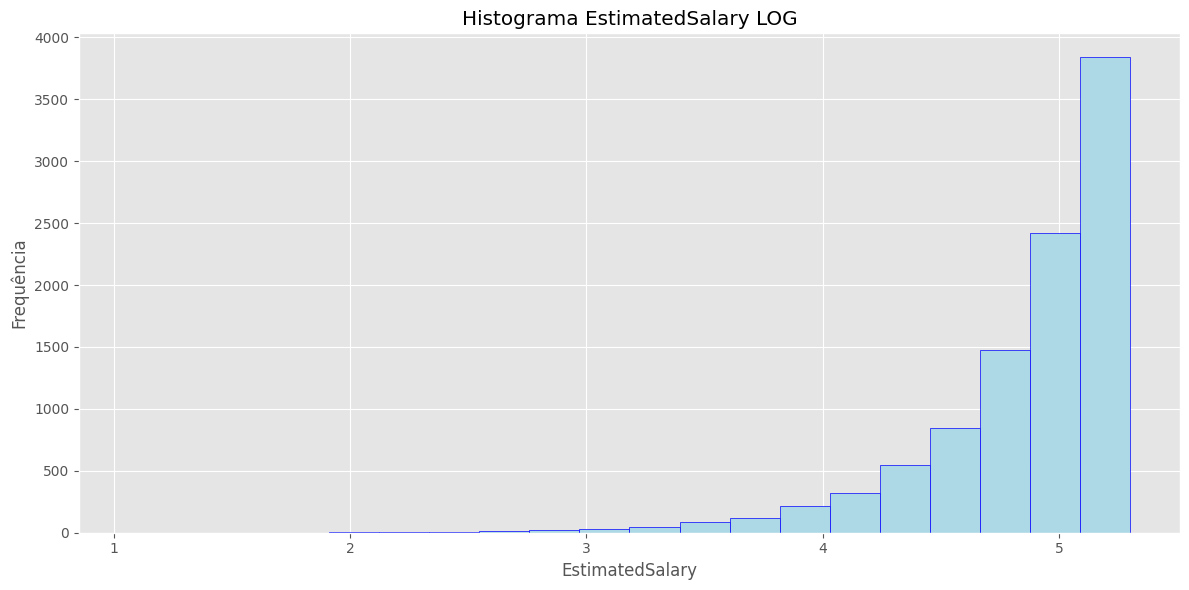

In [66]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
plot_histogram(np.log10(churn_transformed['EstimatedSalary']), 'EstimatedSalary', 'Histograma EstimatedSalary LOG', axes)
plt.tight_layout()
plt.show()

Criando função para detectar os outliers e outra para remove-los

In [110]:
def detect_outliers_tukey(df, column, coef):
    q1 = df[column].quantile(q=0.25)
    q3 = df[column].quantile(q=0.75)
    iqr = q3 - q1
    lower_bound = q1 - coef * iqr
    upper_bound = q3 + coef * iqr
    outliers_below = df[df[column] < lower_bound]
    outliers_above = df[df[column] > upper_bound]
    return outliers_below, outliers_above

def remove_outliers_tukey(df, column, outliers_below, outliers_above):
    cleaned_data = df[~df.index.isin(outliers_below.index) & ~df.index.isin(outliers_above.index)]
    return cleaned_data

Variavel de credito

In [115]:
outliers_below, outliers_above = detect_outliers_tukey(churn_transformed, 'CreditScore', 2)
outliers_below.shape, outliers_above.shape

((6, 14), (0, 14))

In [116]:
outliers_below

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname,Geography,Gender
1631,1632.0,15685372.0,350.0,54.0,1.0,152677.48,1.0,1.0,1.0,191973.49,1.0,Azubuike,Spain,Male
1838,1839.0,15758813.0,350.0,39.0,0.0,109733.20,2.0,0.0,0.0,123602.11,1.0,Campbell,Germany,Male
2473,2474.0,15679249.0,351.0,57.0,4.0,163146.46,1.0,1.0,0.0,169621.69,1.0,Chou,Germany,Female
8723,8724.0,15803202.0,350.0,51.0,5.0,0.00,1.0,1.0,1.0,125823.79,1.0,Martin,France,Male
8762,8763.0,15765173.0,350.0,60.0,3.0,0.00,1.0,0.0,0.0,100185.24,0.0,Lin,France,Female
9624,9625.0,15668309.0,350.0,40.0,0.0,111098.85,1.0,1.0,1.0,172321.21,1.0,Maslow,France,Female


Não acho que sejam outliers preocupantes pra analise, provavelmente é apenas o valor inicial de credito

In [87]:
#churn_transformed = remove_outliers_tukey(churn_transformed, 'CreditScore', outliers_below, outliers_above)

In [88]:
#churn_transformed.shape

(9985, 14)

variavel de EstimatedSalary

In [120]:
outliers_below, outliers_above = detect_outliers_tukey(churn_transformed, 'EstimatedSalary', 1.5)
outliers_below.shape, outliers_above.shape

((0, 14), (0, 14))

variavel de Age

In [123]:
outliers_below, outliers_above = detect_outliers_tukey(churn_transformed, 'Age', 3)
outliers_below.shape, outliers_above.shape

((0, 14), (29, 14))

In [126]:
outliers_above.sort_values(by='Age', ascending=False)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname,Geography,Gender
6759,6760.0,15660878.0,651.0,92.0,1.0,97552.225,2.0,1.0,1.0,34436.83,0.0,T'ien,France,Male
6443,6444.0,15764927.0,753.0,92.0,5.0,121513.310,1.0,0.0,1.0,195563.99,0.0,Rogova,France,Male
2458,2459.0,15813303.0,513.0,88.0,10.0,0.000,2.0,1.0,1.0,52952.24,0.0,Rearick,Spain,Male
3033,3034.0,15578006.0,787.0,85.0,10.0,0.000,2.0,1.0,1.0,116537.96,0.0,Yao,France,Female
3387,3388.0,15798024.0,537.0,84.0,8.0,92242.340,1.0,1.0,1.0,186235.98,0.0,Lori,Germany,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,7376.0,15638871.0,651.0,77.0,6.0,80926.020,2.0,1.0,1.0,55829.25,0.0,Ch'ang,France,Male
3602,3603.0,15582762.0,667.0,77.0,2.0,97552.225,1.0,1.0,1.0,34702.92,0.0,Mazzanti,Spain,Male
2164,2165.0,15794479.0,767.0,77.0,8.0,149083.700,1.0,1.0,1.0,190146.83,0.0,Martin,Spain,Male
9894,9895.0,15704795.0,521.0,77.0,6.0,0.000,2.0,1.0,1.0,49054.10,0.0,Vagin,France,Female
